- 第8章 降维
>- 许多机器学习问题涉及训练实例的几千甚至上百万个特征。
>- 后面我们将会看到， 这不仅导致训练非常缓慢，
>- 也让我们更加难以找到好的解决方案。
>- 这个问题通常被称为维度的诅咒。
>- 幸运的是， 对现实世界的问题， 我们一般可以大量减少特征的数量， 
>- 将棘手的问题转化成容易解决的问题。 
>- 例如， MNIST图像：图像边框的像素位上几乎全是白色，所以我们完全可以在训练集中抛弃这些像素位， 也不会丢失太多信息。 
>-  此外， 两个相邻像素通常是高度相关的：如果将它们合并成一个像素（例如， 取两个像素强度的平均值），也不会丢失太多信息。

# 维度的诅咒

![](img/8-1.png)

- 事实证明， 在高维空间中， 许多事物的行为都迥然不同。
- 例如，如果你在一个单位平面（1×1的正方形） 内随机选择一个点，
- 那么这个点离边界的距离小于0.001的概率只有约0.4%（也就是说，一个随机的点不大可能刚好位于某个维度的“极端”） 。
- 但是，在一个10000维的单位超立方体（1×1…×1立方体， 一万个1） 中， 这个概率大于99.999999%。高维超立方体中大多数点都非常接近边界。

- 还有一个更麻烦的区别：
- 如果你在单位平面中随机挑两个点， 这两个点之间的平均距离大约为0.52。
- 如果在三维的单位立方体中随机挑两个点，两点之间的平均距离大约为0.66。 
- 但是， 如果在一个100万维的超立方体中随机挑两个点呢？
- 不管你相信与否， 平均距离大约为408.25（约等于 ） ！ 
- 这是非常违背直觉的： 位于同一个单位超立方体中的两个点， 怎么可能距离如此之远？ 
- 这个事实说明高维数据集有很大可能是非常稀疏的：大多数训练实例可能彼此之间相距很远。 
- 当然， 这也意味着新的实例很可能远离任何一个训练实例， 导致预测跟低维度相比， 更加不可靠， - 因为它们基于更大的推测。 
- 简而言之， 训练集的维度越高， 过度拟合的风险就越大。

- 理论上来说， 通过增大训练集， 使训练实例达到足够的密度， 是可以解开维度的诅咒的。 
- 然而不幸的是， 实践中， 要达到给定密度所需要的训练实例数量随着维度增加呈指数式上升。 
- 仅仅100个特征下（远小于MNIST问题） ， 
- 要让所有训练实例（假设在所有维度上平均分布） 之间的平均距离小于0.1， 
- 你需要的训练实例数量就比可观察宇宙中的原子数量还要多。

# 数据降维的主要方法

## 投影

- 在大多数现实世界的问题里， 训练实例在所有维度上并不是均匀分布的。 
- 许多特征几乎是不变的， 也有许多特征是高度相关联的（如前面讨论的MNIST数据集） 。 
- 因此， 高维空间的所有训练实例实际上（或近似于） 受一个低得多的低维子空间所影响。 
- 这听起来很抽象， 所以我们来看一个例子。 
- 在图8-2中， 你可以看到一个由圆圈表示的3D数据集。

![](img/8-2.png)

- 注意看， 所有的训练实例都紧挨着一个平面： 这就是高维（3D） 空间的低维（2D） 子空间。
- 现在， 如果我们将每个训练实例垂直投影到这个子空间（如图中实例到平面之间的短线所示），
- 我们将得到如图8-3所示的新2D数据集。 
- 我们已经将数据集维度从三维降到了二维。 
- 注意， 图中的轴对应的是新特征z1和z2（平面上投影的坐标） 。

![](img/8-3.png)

## 流形学习

- 不过投影并不总是降维的最佳方法。 在许多情况下， 子空间可能会弯曲或转动， 比如图8-4所示的著名的瑞士卷玩具数据集。

![](img/8-4.png)

- 简单地进行平面投影（例如放弃x3） 会直接将瑞士卷的不同层压扁在一起， 如图8-5的左图所示。
- 但是你真正想要的是将整个瑞士卷展开铺平以后的2D数据集， 如图8-5的右图所示。

![](img/8-5.png)

- 瑞士卷就是二维流形的一个例子。 
- 简单地说， 2D流形就是一个能够在更高维空间里面弯曲和扭转的2D形状。 
- 更概括地说， d维流形就是n（其中， d＜n） 维空间的一部分， 局部类似于一个d维超平面。
- 在瑞士卷的例子中， d=2， n=3： 它局部类似于一个2D平面， 但是在第三个维度上卷起。

- 许多降维算法是通过对训练实例进行流形建模来实现的， 这被称为流形学习。 
- 它依赖于流形假设， 也称为流形假说， 认为大多数现实世界的高维度数据集存在一个低维度的流形来重新表示。 
- 这个假设通常是凭经验观察的

- 再次说到MNIST数据集： 所有手写的数字图像都有一些相似之处。 
- 它们由相连的线条组成， 边界都是白色的， 或多或少是居中的，等等。 
- 如果你随机生成图像， 只有少到不能再少的一部分可能看起来像手写数字。 
- 也就是说， 如果你要创建一个数字图像， 
- 你拥有的自由度要远远低于允许你创建任意图像的自由度。 
- 而这些限制正倾向于将数据集挤压成更低维度的流形。

- 流形假设通常还伴随着一个隐含的假设： 
- 如果能用低维空间的流形表示， 手头的任务（例如分类或者回归） 将变得更简单。 
- 例如， 图8-6的上面一行， 瑞士卷被分为两类： 3D空间中（左上） 决策边界将会相当复杂， 
- 但是在展开的2D流形空间（右上） ， 决策边界是一条简单的直线。

![](img/8-6-1.png)![](img/8-6-2.png)

![](img/8-6-3.png)![](img/8-6-4.png)

# PCA

- 主成分分析（PCA） 是迄今为止最流行的降维算法。 
- 它先是识别出最接近数据的超平面， 然后将数据投影其上。

## 保留差异性
- 将训练集投影到低维超平面之前， 需要选择正确的超平面。 
- 例如图8-7的左图代表一个简单的2D数据集， 沿三条不同的轴（即一维超平面） 。 
- 右图是将数据集映射到每条轴上的结果。 
- 正如你所见， 在实线上的投影保留了最大的差异性， 
- 而点线上的投影只保留了非常小的差异性， 虚线上的投影差异性居中

![](img/8-7.png)

- 选择保留最大差异性的轴看起来比较合理， 因为它可能比其他两种投影丢失的信息更少。 
- 要证明这一选择， 还有一种方法， 比较原始数据集与其轴上的投影之间的均方距离， 使这个均方距离最小的轴是最合理的选择， 也就是实线代表的轴。 这也正是PCA背后的简单思想

## 主成分

- 主成分分析（PCA） 可以在训练集中识别出哪条轴对差异性的贡献度最高。
- 在图8-7中， 即是由实线表示的轴。 同时它也找出了第二条轴， 它对剩余差异性的贡献度最高， 与第一条轴垂直。 
- 因为这个例子是二维的， 所以除了这条点线再没有其他。 
- 如果是在更高维数据集中， PCA还会找到与前两条都正交的第三条轴， 以及第四条、 第五条， 等等——轴的数量与数据集维度数量相同。

- 定义第i条轴的单位向量就叫作第i个主成分（PC） 。 
- 图8-7中，第一个主成分是c1， 第二个主成分是c2。 
- 在图8-2中， 前两个主成分是平面里正交的箭头所示， 第三个主成分则是垂直于平面（向上或向下）

$
\mathbf{V} =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [8]:
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

In [9]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [10]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [11]:
V.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

## 低维度投影

- 一旦确定了所有主成分， 就可以将数据集投影到由前d个主成分定义的超平面上， 从而将数据集的维度降到d维。 
- 这个超平面的选择， 能确保投影保留尽可能多的差异性。 
- 例如， 在图8-2中， 3D数据集投影到由前两个主成分定义的2D平面上， 就保留了原始数据集的大部分差异。 
- 因此， 2D投影看起来非常像原始的3D数据集。

### 将训练集投影到低维度
- 要将训练集投影到超平面上， 简单地计算训练集矩阵X和矩阵Wd的点积即可， 
- Wd是包含前d个主成分的矩阵（即由矩阵VT的前d列组成的矩阵）
$$ X_{d-proj}=X·W_d $$

In [16]:
W2 = V.T[:,:2]
X2D = X_centered.dot(W2)

In [21]:
X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

In [23]:
X2D_old = X2D

## 使用Scikit-Learn
- 跟我们之前一样， Scikit-Learn的PCA类也使用SVD分解来实现主成分分析。 
- 以下代码应用PCA将数据集的维度降到二维（注意它会自动处理数据集中）

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [25]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [26]:
X2D_old[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

- 请注意，在稍微不同的数据集中多次运行PCA可能会导致不同的结果。
- 一般来说，唯一的区别是有些轴可能会翻转。
- 在本例中，使用SciKit Learn的PCA给出的投影与SVD方法给出的投影相同，但两个轴都翻转了：

In [27]:
np.allclose(X2D, -X2D_old)

True

- 将PCA转换器应用到数据集之后， 你可以通过变量components_来访问主成分（它包含的主成分是水平向量， 
- 因此举例来说， 第一个主成分即等于pca.components_.T[： ， 0]） 。

In [29]:
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

## 方差解释率
- 另一个非常有用的信息是每个主成分的方差解释率， 
- 它可以通过变量explained_variance_ratio_获得。 
- 它表示每个主成分轴对整个数据集的方差的贡献度。 

In [30]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## 选择正确数量的维度

- 除了武断地选择要降至的维度数量， 通常来说更好的办法是将靠前的主成分方差解释率依次相加， 直到得到足够大比例的方差（例如95%） ， 
- 这时的维度数量就是很好的选择。 
- 当然， 除非你正在为了数据可视化而降维——这种情况下， 通常会直接降到二维或三维。

In [40]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [44]:
X = mnist.data

### 计算出包含95%贡献率的维度

In [60]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [61]:
cumsum

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

In [62]:
d

154

In [63]:
pca = PCA(n_components=d)
pca.fit(X)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.0019147 , 0.00188549,
       0.00186976, 0.00180104, 0.00176787, 0.00173358, 0.00164

### 直接得到包含95%维度的降维数据集

In [65]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [66]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

In [67]:
np.sum(pca.explained_variance_ratio_)

0.9503499702078612

In [68]:
pca.explained_variance_ratio_.shape

(154,)

### 绘制成关于维度数量的函数（绘制cumsum即可)

In [69]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [71]:
cumsum.shape

(784,)

In [77]:
X_temp = np.linspace(0,784, 784)

Text(0, 0.5, '解释方差')

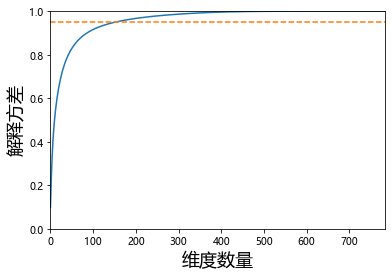

In [85]:
plt.plot(X_temp, cumsum)
plt.xlim(0,784)
plt.ylim(0,1.0)
plt.plot(X_temp, np.linspace(0.95, 0.95, 784), '--')
plt.xlabel('维度数量', fontsize=18)
plt.ylabel('解释方差', fontsize=18)

## PCA压缩

- 显然， 降维之后训练集占用的空间要小得多。 
- 例如， 对MNIST数据集应用主成分分析， 然后保留其方差的95%。 
- 你会发现， 原来每个实例的784个特征变得只有150多个特征。 
- 所以这保留了绝大部分差异性的同时， 数据集的大小变为不到原始的20%！ 
- 这是一个合理的压缩比， 你可以看看它如何极大提升分类算法（例如SVM分类器） 的速度

- 在PCA投影上运行投影的逆转换， 也可以将缩小的数据集解压缩回784维数据集。 
- 当然， 你得到的并非原始的数据， 因为投影时损失了一部分信息（5%被丢弃的方差） ， 
- 但是它很大可能非常接近于原始数据。 
- 原始数据和重建数据（压缩之后解压缩） 之间的均方距离，被称为重建误差。 

$$ X_{recovered}=X_{d-proj}·W_d^T $$

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
X = mnist.data
y = mnist.target

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [95]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

In [99]:
X_reduced.shape

(52500, 154)

In [100]:
pca.inverse_transform(X_reduced).shape

(52500, 784)

## 增量PCA

- 前面关于主成分分析的种种实现， 问题在于， 它需要整个训练集都进入内存， 才能运行SVD算法。
- 幸运的是， 我们有增量主成分分析（IPCA） 算法： 
- 你可以将训练集分成一个个小批量， 一次给IPCA算法喂一个。 
- 对于大型训练集来说， 这个方法很有用， 并且还可以在线应用PCA（也就是新实例产生时， 算法开始运行）。

- 以下代码将MNIST数据集分成100个小批量（使用NumPy的array_split（） 函数） ， 
- 将它们提供给Scikit-Learn的- IncrementalPCA
- 将数据集降到154维（跟之前一样） 。 
- 注意， 你必须为每个小批量调用partial_fit（） 方法， 而不是之前整个训练集的fit（） 方法：

In [103]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

In [109]:
np.sum(inc_pca.explained_variance_ratio_)

0.9496651061456837

- 也可以使用NumPy的memmap类， 
- 它允许你巧妙地操控一个存储在磁盘二进制文件里的大型数组， 就好似它也完全在内存里一样，
- 而这个类（memmap） 仅在需要时加载内存中需要的数据。
- 由于IncrementalPCA在任何时间都只使用数组的一小部分，
- 因此内存的使用情况仍然受控， 这时可以调用常用的fit（） 方法， 如以下代码所示：

In [ ]:
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

## 随机PCA

- Scikit-Learn还提供了另一种实施PCA的选项， 称为随机PCA。 
- 这是一个随机算法， 可以快速找到前d个主成分的近似值。 
- 它的计算复杂度是O（m×d2） +O（d3） ， 而不是O（m×n2） +O（n3） ， 
- 所以当d远小于n时， 它比前面提到的算法要快得多。

In [111]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X)

In [113]:
np.sum(rnd_pca.explained_variance_ratio_)

0.9499543357544052

# 核主成分分析

- 第5章讨论了核技巧， 它是一种数学技巧， 隐性地将实例映射到非常高维的空间（称为特征空间） ， - 从而使支持向量机能够进行非线性分类和回归。 
- 回想一下， 高维特征空间的线性决策边界如何对应于原始空间中复杂的非线性决策边界。
- 事实证明， 同样的技巧也可应用于PCA， 使复杂的非线性投影降维成为可能。 
- 它擅长在投影后保留实例的集群， 有时甚至也能展开近似于一个扭曲流形的数据集。

In [114]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [117]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

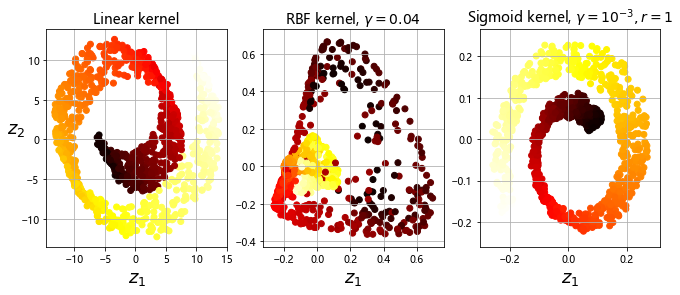

In [120]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
plt.show()

## 选择核函数和调整超参数
- 由于kPCA是一种无监督的学习算法， 因此没有明显的性能指标来帮你选择最佳的核函数和超参数值。
- 而降维通常是监督式学习任务（例如分类） 的准备步骤， 
- 所以可以使用网格搜索， 来找到使任务性能最佳的核和超参数。 

- 下面的代码创建了一个两步流水线，
- 首先使用kPCA将维度降至二维， 
- 然后应用逻辑回归进行分类。 
- 接下来使用GridSearchCV为kPCA找到最佳的核和gamma值， 
- 从而在流水线最后获得最准确的分类：

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [145]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(solver="liblinear"))
])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
}]

In [146]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

In [147]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

In [148]:
X.shape

(1000, 3)

In [149]:
y.shape

(1000,)

In [150]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [151]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

- 还有一种完全不受监督方法， 就是选择重建误差最低的核和超参数。 
- 但是这个重建不像线性PCA重建那样容易。 我们来看看原因， 
- 图8-11显示了瑞士卷的原始3D数据集（左上） ， 和应用RBF核的kPCA得到的二维数据集（右上） 。 
- 因为核技巧， 所以这在数学上等同于：
- 通过特征映射函数 ， 将训练集映射到无限维度的特征空间（右下） ，
- 然后用线性PCA将转换后的训练集投影到2D平面。 
- 注意， 如果我们对一个已经降维的实例进行线性PCA逆转换， 重建的点将存在于特征空间， 而不是原始空间中（例如， 图中x表示的那个点） 。 
- 而这里特征空间是无限维度的， 所以我们无法计算出重建点， 
- 因此也无法计算出真实的重建误差。 
- 幸好， 我们可以在原始空间中找到一个点， 使其映射接近于重建点。 
- 这被称为重建原像。 一旦有了这个原像， 你就可以测量它到原始实例的平方距离。 最后， 
- 便可以选择使这个重建原像误差最小化的核和超参数

![](img/8-11.png)

In [156]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [158]:
X_reduced.shape

(1000, 2)

In [160]:
X_preimage.shape

(1000, 3)

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.78630879576614

# 局部线性嵌入

- 局部线性嵌入（https://goo.gl/iA9bns） （LLE）是另一种非常强大的非线性降维（NLDR） 技术。 
- 不像之前的算法依赖于投影， 它是一种流形学习技术。 
- 简单来说， LLE首先测量每个算法如何与其最近的邻居（c.n.） 线性相关，
- 然后为训练集寻找一个能最大程度保留这些局部关系的低维表示（细节稍后解释） 。 
- 这使得它特别擅长展开弯曲的流形， 特别是没有太多噪声时。

- 例如， 下面的代码使用Scikit-Learn的LocallyLinearEmbedding类来展开瑞士卷。 得到的二维数据集如图8-12所示。 
- 正如你所见， 瑞士卷完全展开， 实例之间的距离局部保存得很好。 
- 不过从整体来看， 距离保存得不够好： 展开的瑞士卷左侧被挤压， 而右侧被拉长。 
- 尽管如此， 对于流形建模来说， LLE还是做得相当不错。

In [173]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [174]:
from sklearn.manifold import LocallyLinearEmbedding

In [180]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

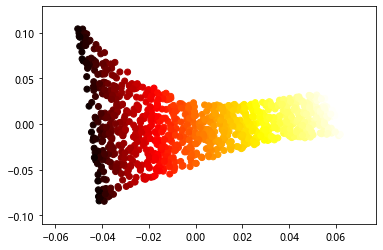

In [184]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

- 下面是LLE的工作原理：
- 首先， 对于每个训练实例x（i） ， 
- 算法会识别出离它最近的k个邻居（上面的代码中k=10） ， 
- 然后尝试将x（i）重建为这些邻居的线性函数。 
- 更具体来说， 就是要找到权重wi， j使实例x（i） 和 之间的距离平方最小， 
- 如果实例x（i） 不是实例x（i）的k个最近的邻居之一， wi， j＝0。 
- 因此， LLE的第一步就是公式8-4所示的约束优化问题， 其中W是包含所有权重wi， j的权重矩阵， - 第二个约束则是简单地对每个训练实例x（i） 的权重进行归一。

## LLE第一步： 对局部关系线性建模

$$ \hat{W}=argmin_W\sum_{i=1}^m||X^{(i)}-\sum_{j=1}^nw_{i,j}X^{(i)}||^2 $$

- 这一步完成后， 权重矩阵 （包含权重 ） 对训练实例之间的局部线性关系进行编码。 
- 现在， 第二步就是要将训练实例映射到一个d维空间（d＜n） ， 同时尽可能保留这些局部关系。 
- 如果z（i） 是实例x（i） 在这个d维空间的映像， 
- 那么我们希望从z（i） 到 之间的平方距离尽可能小。 
- 这个想法产生了如下公式描述的一个无约束优化问题。 
- 它看起来与第一步类似， 但不是保持固定距离寻找最佳权重， 而是保持固定权重， 并在低维空间中找到每个实例映像的最佳位置。 注意Z是包含所有z（i） 的矩阵。

## LLE第二步： 保留关系并降维

$$ \hat{Z}=argmin_Z\sum_{i=1}^m|| z^{(i)}-\sum_{j=1}^m\hat{w}_{i,j}Z^{(j)} ||^2 $$

- Scikit-Learn的LLE实现， 计算复杂度如下： 
- 寻找k个最近邻为O（m log（m） n log（k） ） ； 
- 优化权重为O（mnk3） ； 
- 构建低维表示， 为O（dm2） 。 
- 很不幸， 最后一个表达式里的m2说明这个算法很难扩展应用到大型数据集。

# 其他降维技巧

## 多维缩放（MDS） 算法，
- 保持实例之间的距离， 降低维度

## 等度量映射（Isomap） 算法， 
- 将每个实例与其最近的邻居连接起来， 创建连接图形， 然后保留实例之间的这个测地距离， [1]降低维度。

## t-分布随机近邻嵌入（t-SNE） 算法
- 在降低维度时， 试图让相似的实例彼此靠近， 不相似的实例彼此远离。 
- 它主要用于可视化， 尤其是将高维空间中的实例集群可视化（例如， 对MNIST图像进行二维可视化） 。

## 线性判别（LDA）
- 实际上是一种分类算法， 
- 但是在训练过程中， 它会学习类别之间最有区别的轴， 
- 而这个轴正好可以用来定义投影数据的超平面。 
- 这样做的好处在于投影上的类别之间会尽可能的分开， 
- 所以在运行其他分类算法——比如SVM分类器之前， LDA是一个不错的降维手段

![](img/8-12.png)